<a href="https://colab.research.google.com/github/ShivinM-17/PyTorch-practices/blob/main/Linear_Regression_model_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch workflow fundamentals

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Checking the torch version
torch.__version__

'2.0.1+cu118'

### Data Preparation and loading

Using a linear regression equation with weights and biases to make the data

In [3]:
# Creating the known parameters
weight = 0.7
bias = 0.3

# Creating the data
start=0
end=1
step=0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X, X.ndim, X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 2,
 torch.Size([50, 1]))

In [5]:
y, y.ndim, y.shape

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660],
         [0.5800],
         [0.5940],
         [0.6080],
         [0.6220],
         [0.6360],
         [0.6500],
         [0.6640],
         [0.6780],
         [0.6920],
         [0.7060],
         [0.7200],
         [0.7340],
         [0.7480],
         [0.7620],
         [0.7760],
         [0.7900],
         [0.8040],
         [0.8180],
         [0.8320],
         [0.8460],
         [0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 2,
 torch.Size([50, 1]))

Now, using the linear equation with weights and biases, we have made the features (X)and labels (Y)

In [6]:
# Creating train test split
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
# Making a function to visualise the data
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot the training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot the testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Checking if predictions is None or not
  if predictions is not None:
    # If not None, then plot it in red
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Display the legend
  plt.legend(prop={"size":14});

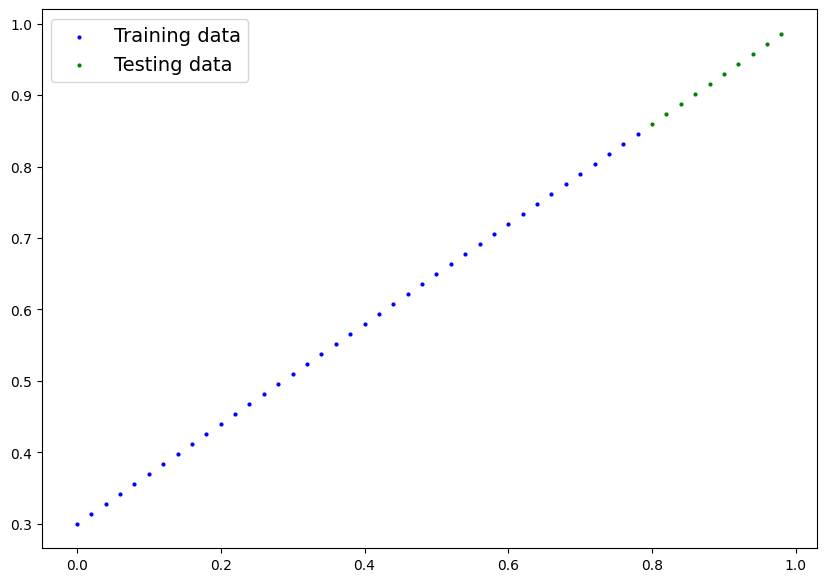

In [8]:
plot_predictions()

### Building the model

Replicating a linear regression model using PyTorch

In [13]:
# Creating a Linear regression model
from torch import nn

# Almost every model class we build inherits from nn.module in PyTorch
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,  # Start with a random weight, and then try to adjust it with the ideal weight
                                   requires_grad=True,  # Can be uploaded via gradient descent or not
                                   dtype=torch.float))  # PyTorch -> expects float32 dtype

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias   # Linear regression formula



**PyTorch model building essentials**

* nn.module -> contains all of the building for computational graphs ( a neural network can be considered a computational graph)
* nn.Parameter - what parameters should the model try and learn (often the PyTorch layer from torch.nn sets these for us)
* torch.nn.Module - base class for all neural network modules (but if in case of sub-classing it, it is advised to overwrite the forward() function)
* torch.optim - contains the PyTorch optimizers, (helping with gradient descent, etc)
* torch.utils.data.Dataset - represents map between key (label) and sample (features) pairs of the data. Such as images and their associated labels
* torch.utils.data.DataLoader - creates a python iterable over a PyTorch dataset (allowing to iterate over the data)


### Checking the contents of the model

In [14]:
# Create a random seed
torch.manual_seed(42)

# Creating an instance of the model
model0 = LinearRegressionModel()

# Check out the parameters
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
# Listing the named parameters
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

In [20]:
# Without inference mode
y_preds = model0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [18]:
# Make predictions with the model
with torch.inference_mode():
  y_preds=model0(X_test)

# In older version, torch.no_grad() is also used
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

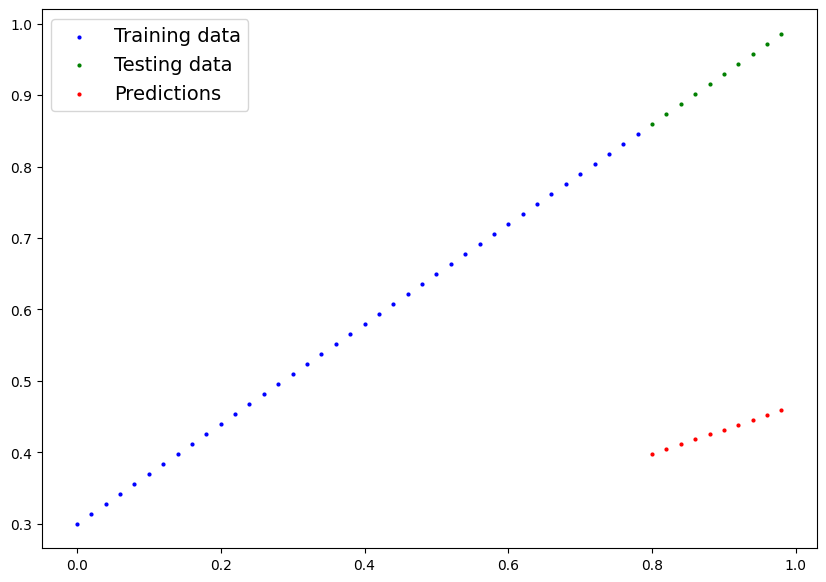

In [19]:
# plotting the predictions
plot_predictions(predictions=y_preds)

### Training the model

Whole idea of training the model is to move from some unknown parameters to some known parameters (which we may require).  

* One way to check how poor the model performs is by using a loss  function

* Note: Loss functions are also called cost functions or criterions in different cases.

* **Loss Function** -  function that measures how wrong the model's predictions are wrt to the ideal outputs required

* **Optimizers** - takes into account the losses of the model, and accordingly adjusts its parameters

In [21]:
# Create the loss functions
loss_fn = nn.L1Loss()  # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.01)  # Learning rate

#### Creating an optimization loop in PyTorch

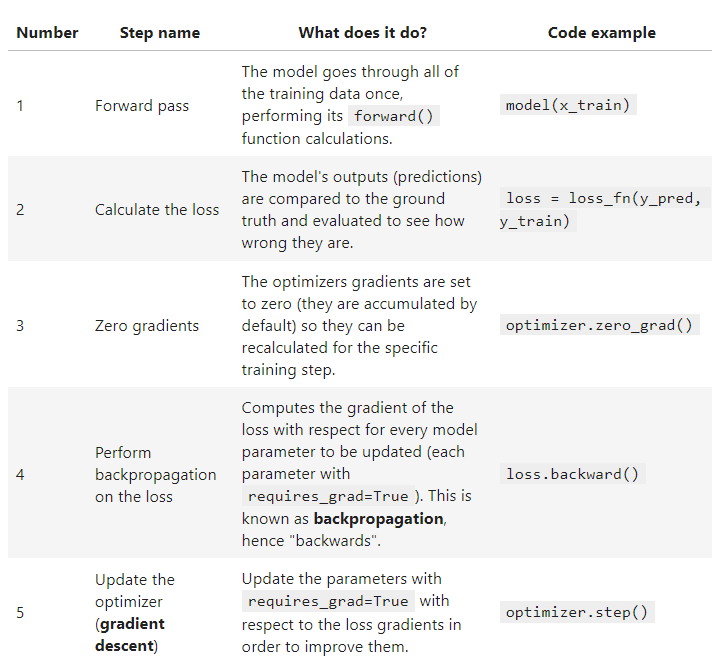

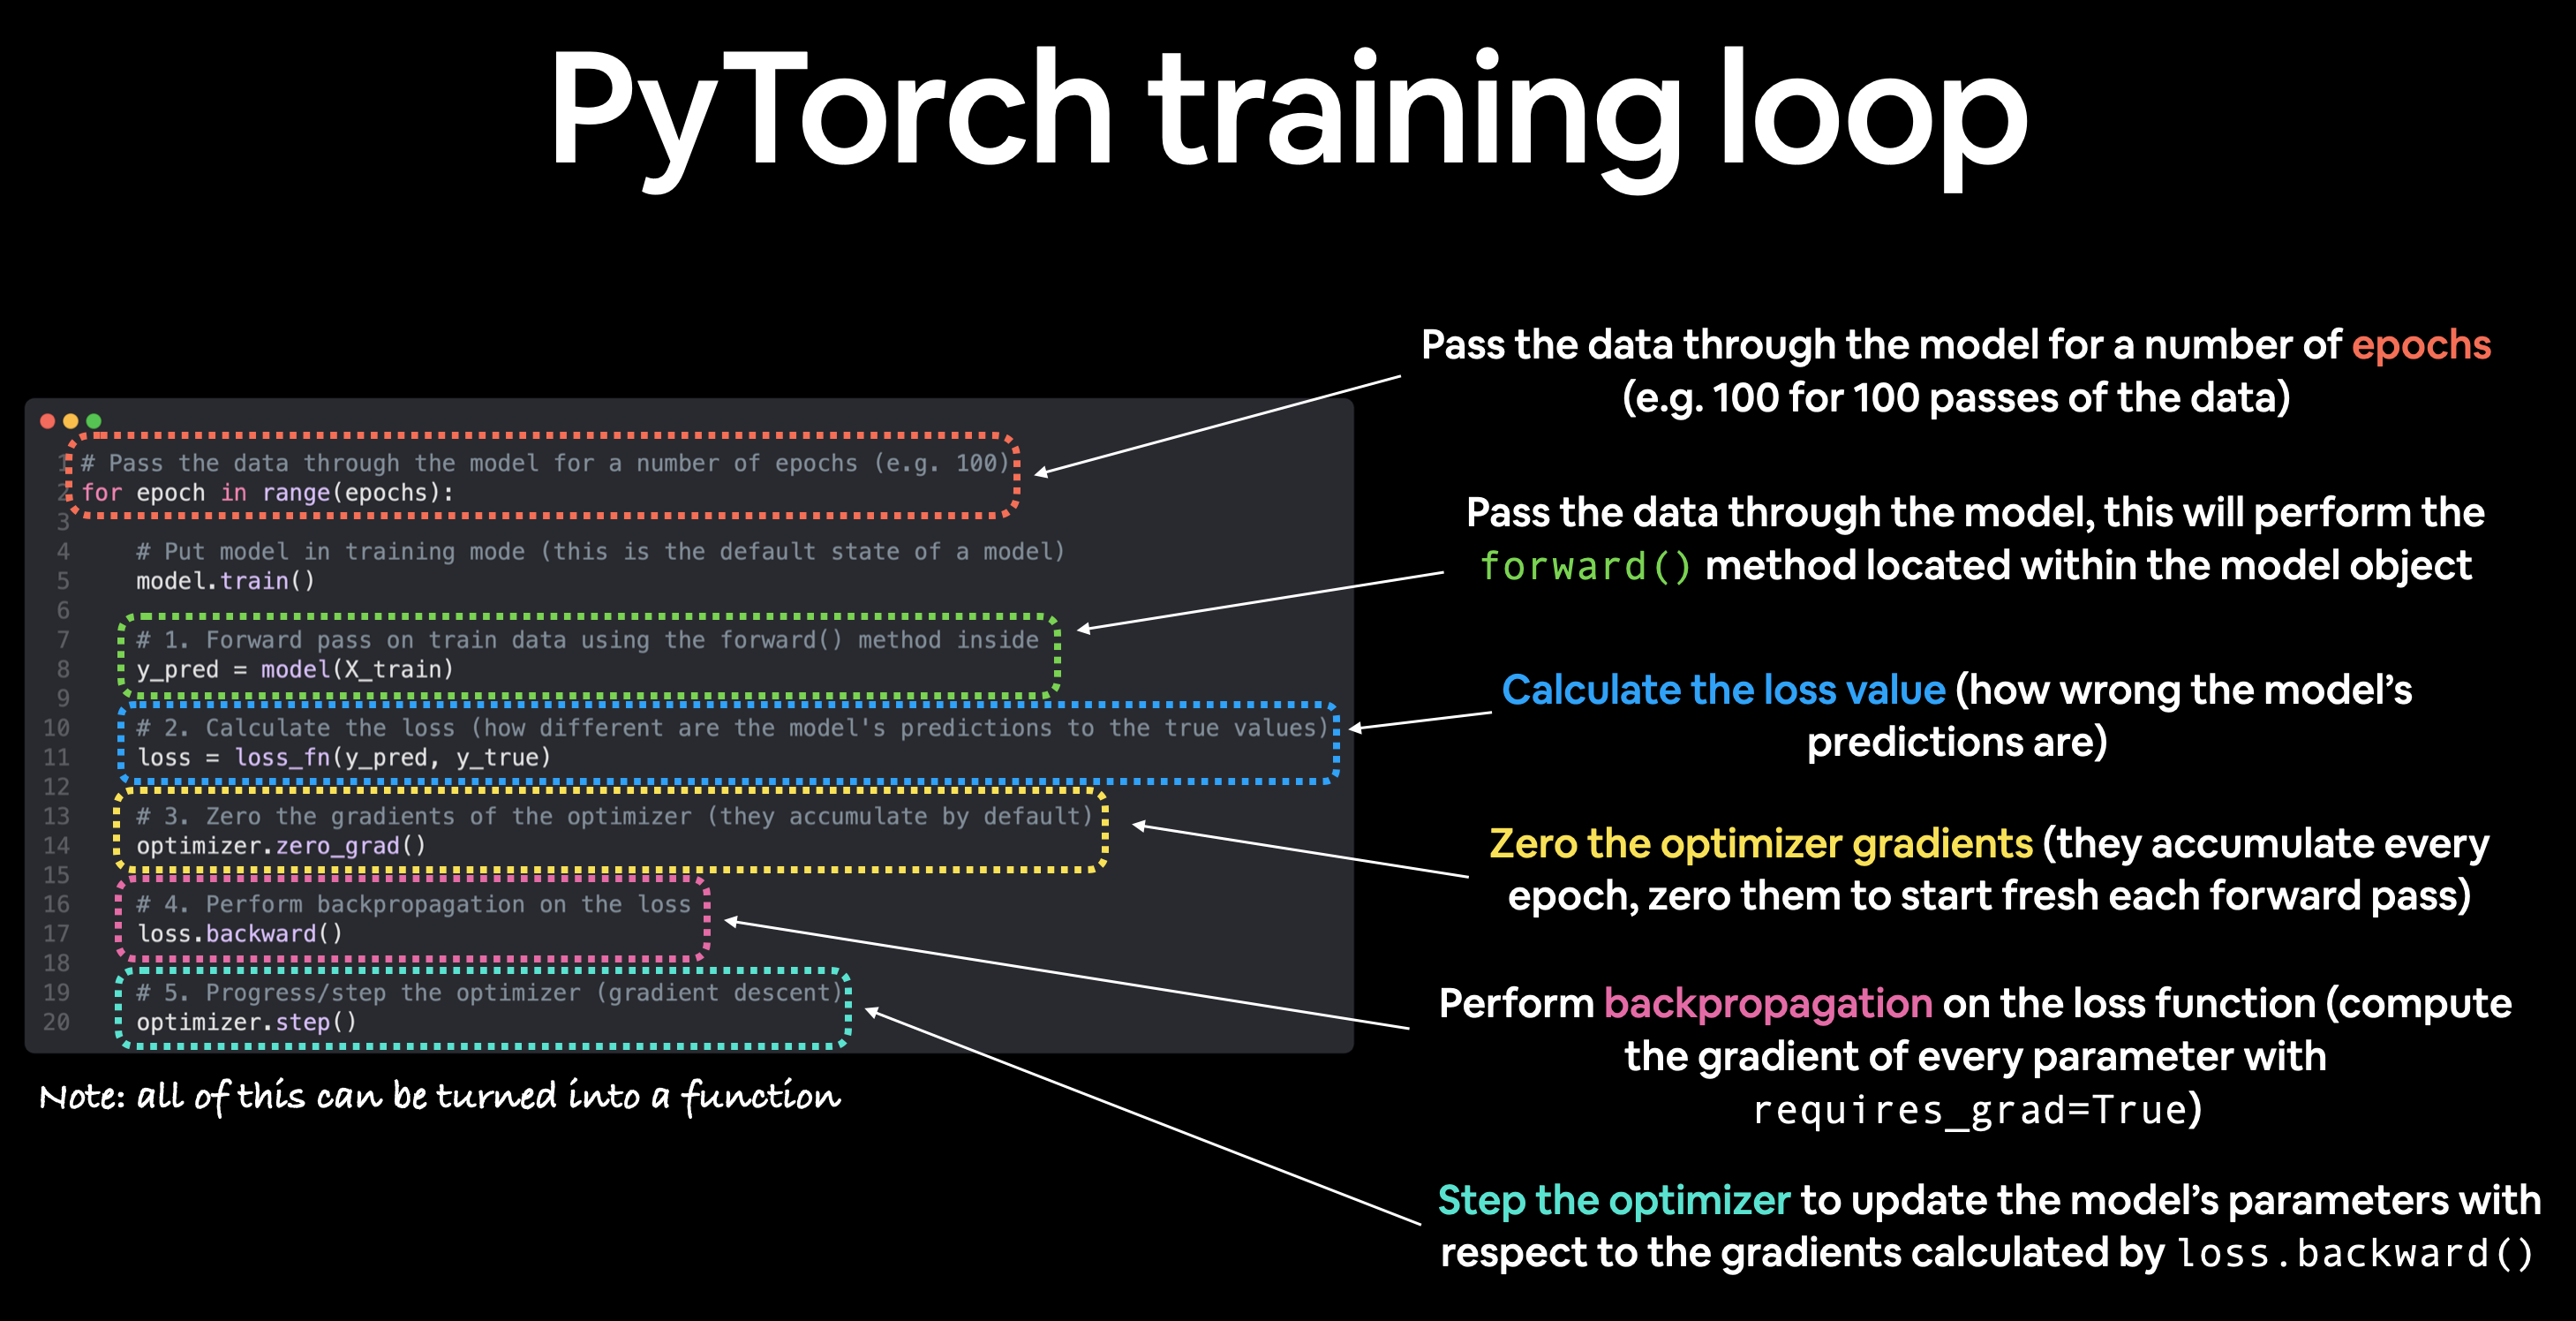

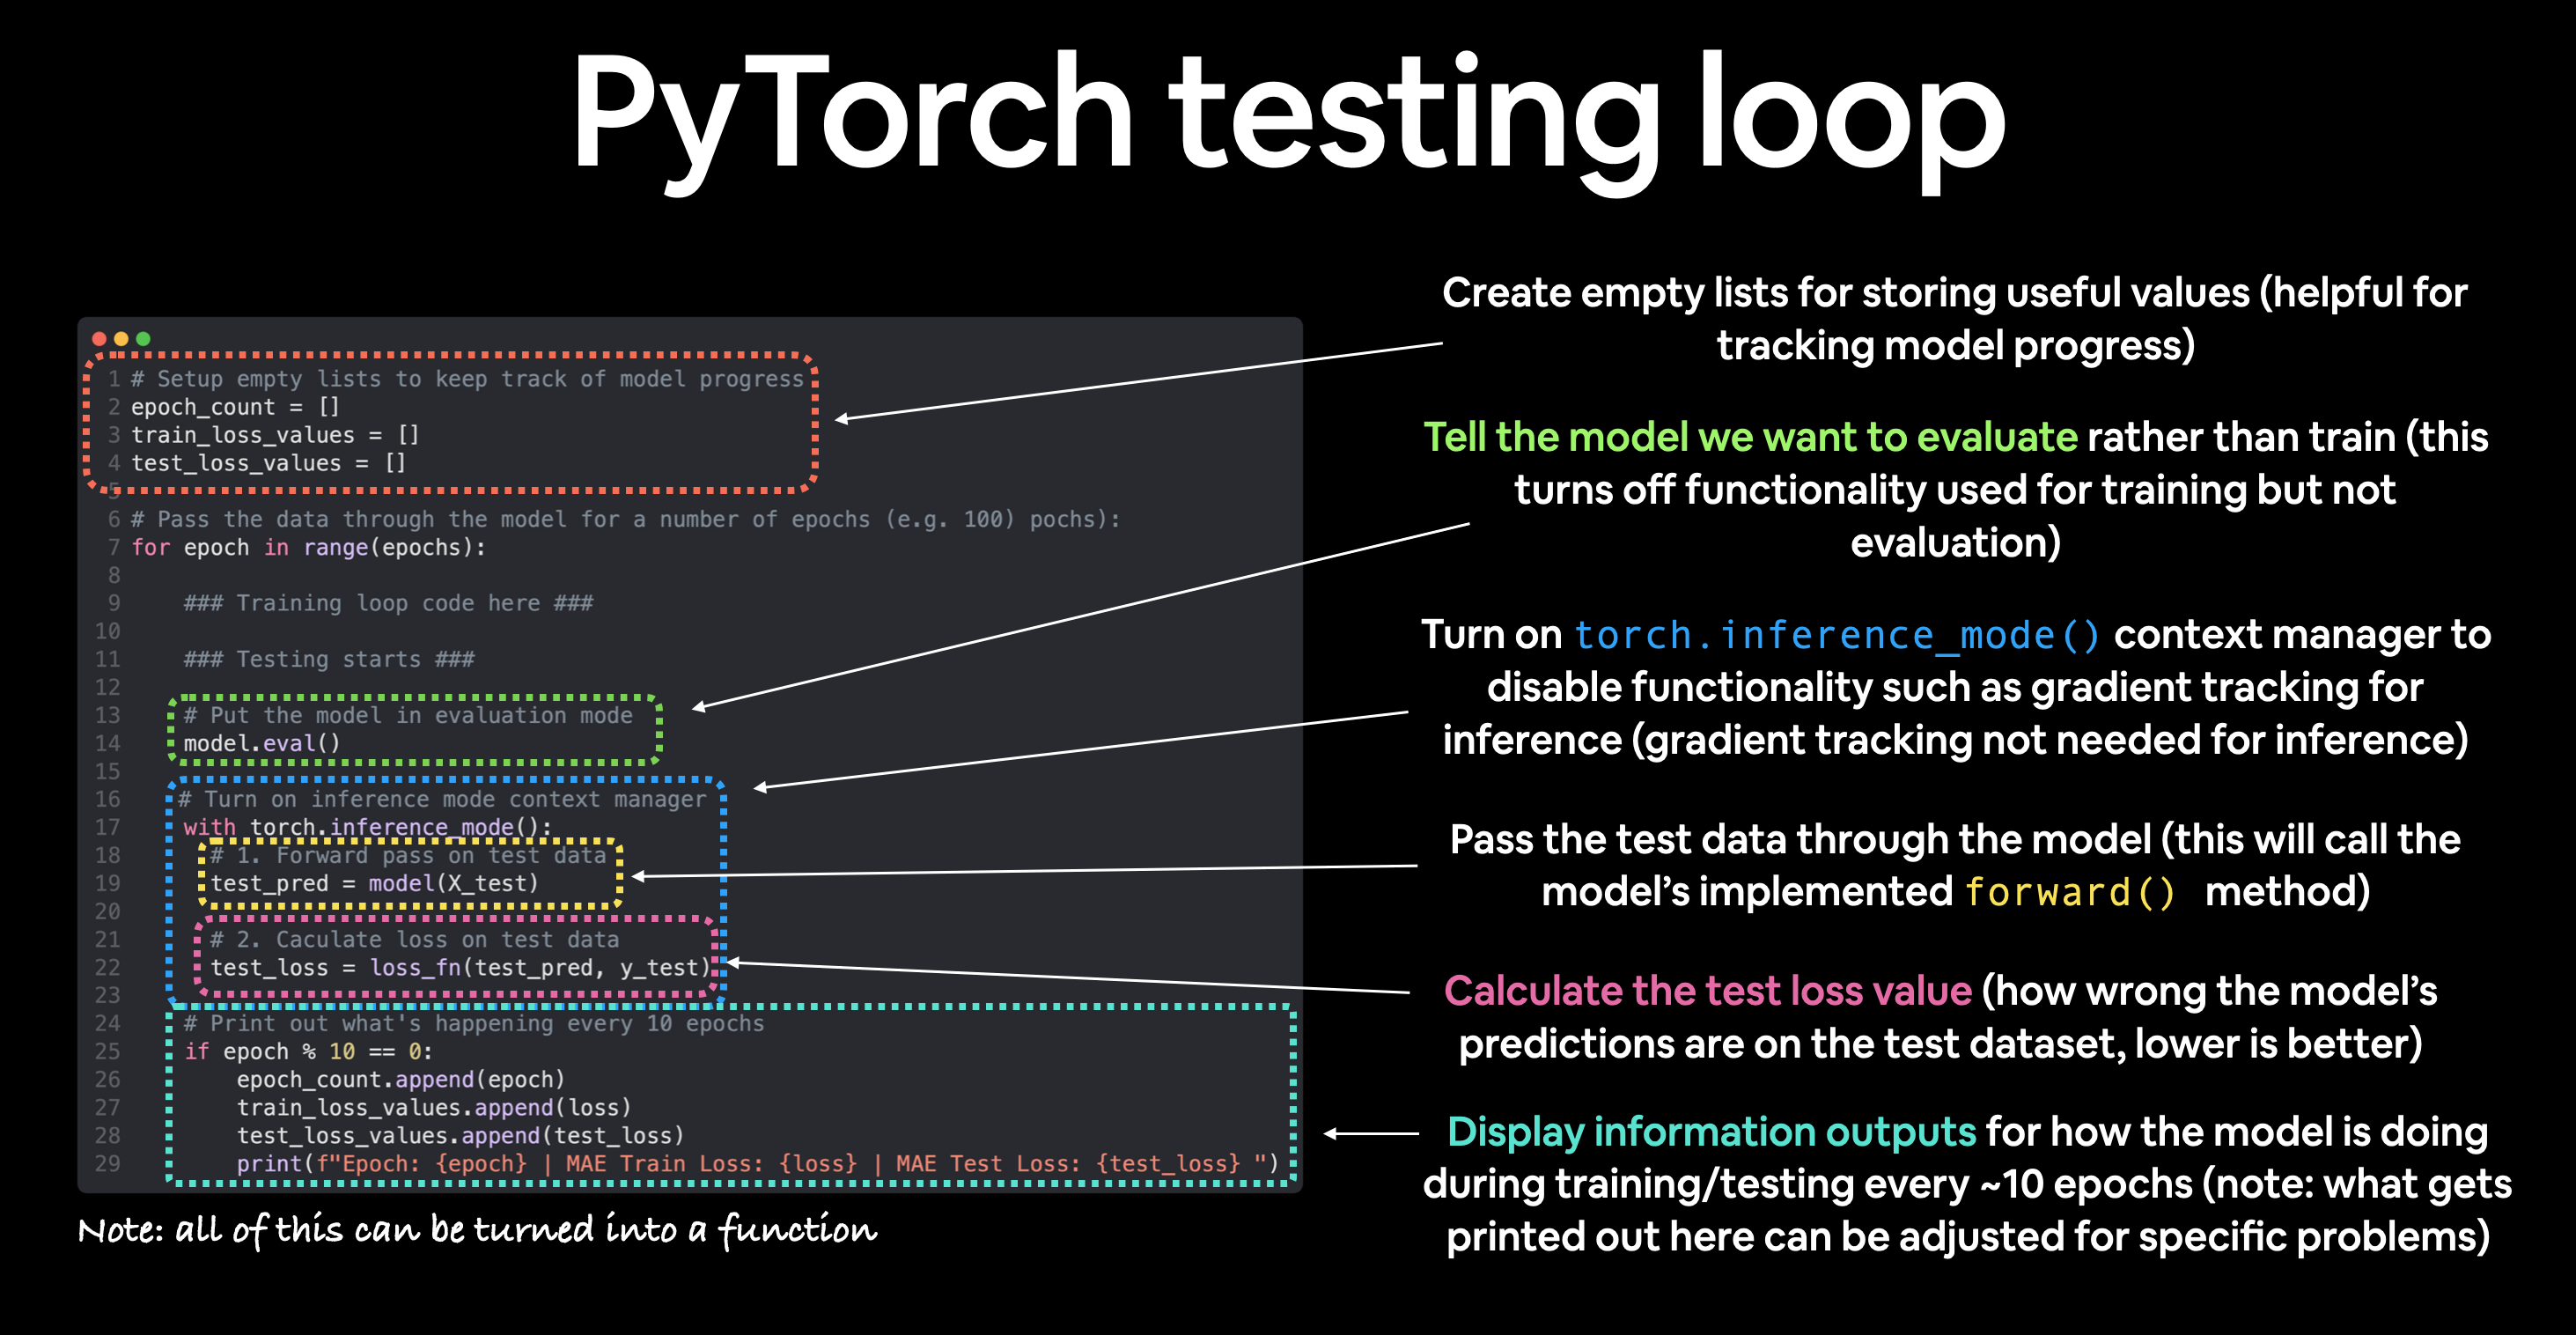

In [23]:
# Set the random seed
torch.manual_seed(42)

# Setting the number of epochs
epochs = 100

# Create empty loss lists to track values while testing
train_loss_values=[]
test_loss_values=[]
epoch_count=[]

## Making the testing and training loop
for epoch in range(epochs):
  #### Training phase ####

  # Put the model in training model
  model0.train()

  # Now Forward pass on the train data using forward() function
  y_preds = model0(X_train)
  #print(y_preds)

  # Calculate the loss
  loss = loss_fn(y_preds, y_train)

  # Zero grad of the optimizer
  optimizer.zero_grad()

  # Loss backwards
  loss.backward()

  # Progress the optimizers
  optimizer.step()

  #### Testing phase ####

  # Put the model in evaluation mode
  model0.eval()

  with torch.inference_mode():
    # Forward pass on test data
    test_pred = model0(X_test)

    # Calculate the loss on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))
    # for the prediction, since they come in torch.float dtype

    # Printing out the changes happening
    if epoch % 10 ==0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test loss: 0.06473556160926819


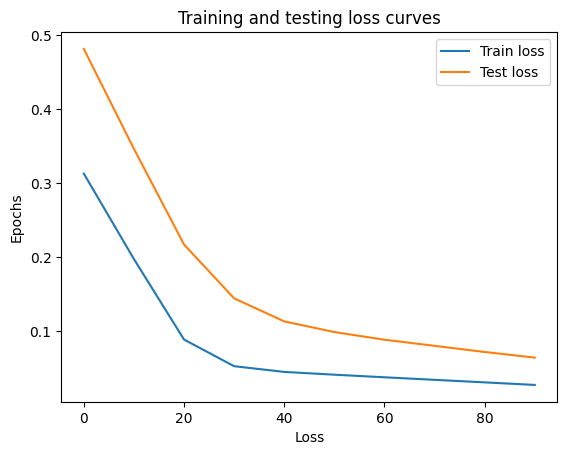

In [24]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and testing loss curves")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend();

We can see that the loss curves go down, showing that the model is performing well enuf

In [26]:
# Now, checking the model's learned parameters
print("The model learned the following values for weights and bias:")
print(model0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


We can see that the learned parameters are quite close to the ideal/intended parameters

### Making predictions with the model

In [33]:
# Set the model in evaluation mode
model0.eval()

# Setup the inference mode context manager
with torch.inference_mode():
  # NOTE - make sure that the predictions are done on the same device
  # Supposedly, if not in the same devices, do this
  # model0.to(device)
  # X_test = X_test.to(device)

  y_preds = model0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

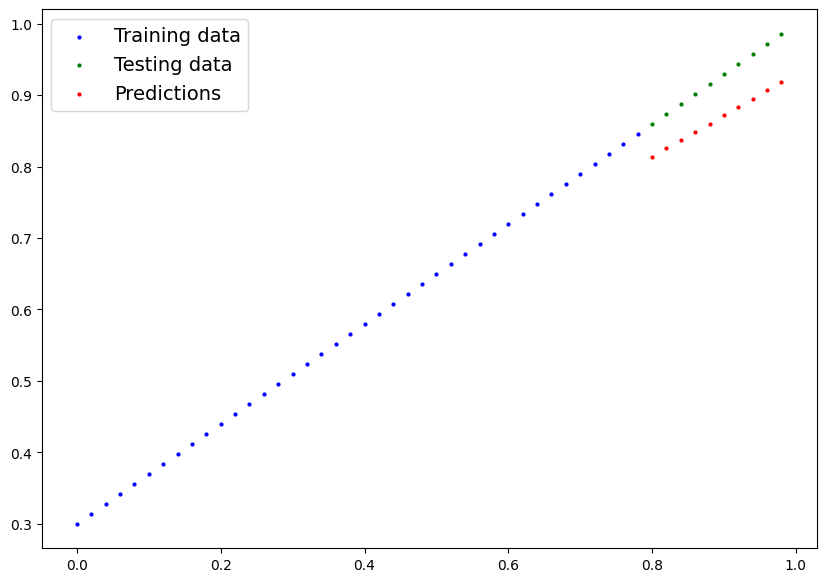

In [28]:
plot_predictions(predictions=y_preds)

Here, we can see that the model performs better than when there were no loss and optimizers and predictions were made without them

### Saving and loading a model

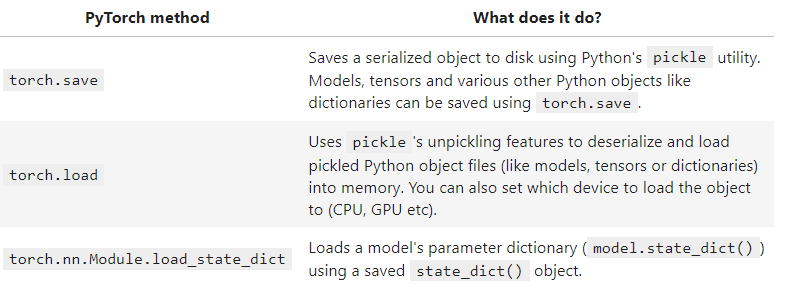

#### Saving a model's `state_dict()`

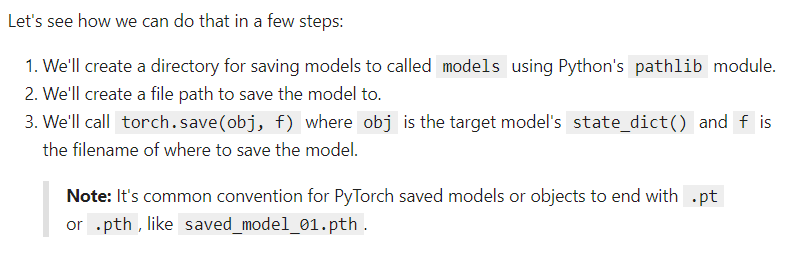

In [29]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "linear_regression_model_pytorch.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/linear_regression_model_pytorch.pth


In [30]:
# Check the saved file path
!ls -l models/linear_regression_model_pytorch.pth

-rw-r--r-- 1 root root 1223 Aug  3 17:42 models/linear_regression_model_pytorch.pth


#### Loading a saved model's `state_dict()`

In [31]:
# Instantiate a new instance of the model
loaded_model0 = LinearRegressionModel()

# Loaded the saved state_dict of the saved model
loaded_model0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

#### Testing the loaded model

In [34]:
# Put the model in evaluation mode
loaded_model0.eval()

with torch.inference_mode():
  loaded_y_preds = loaded_model0(X_test)
loaded_y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [35]:
# Checking if both the predictions are equal or not
y_preds == loaded_y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Creating a PyTorch Linear model

### Data making

In [36]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [37]:
# Splitting the data into training and testing sets
# Splitting in ratio of 80:20
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

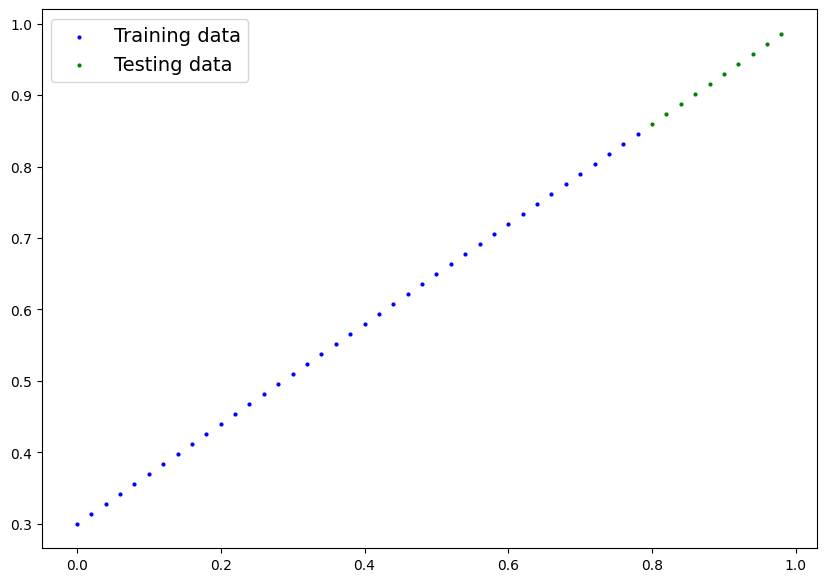

In [38]:
# Plotting the data
plot_predictions(X_train, y_train, X_test, y_test)

### Building the linear model

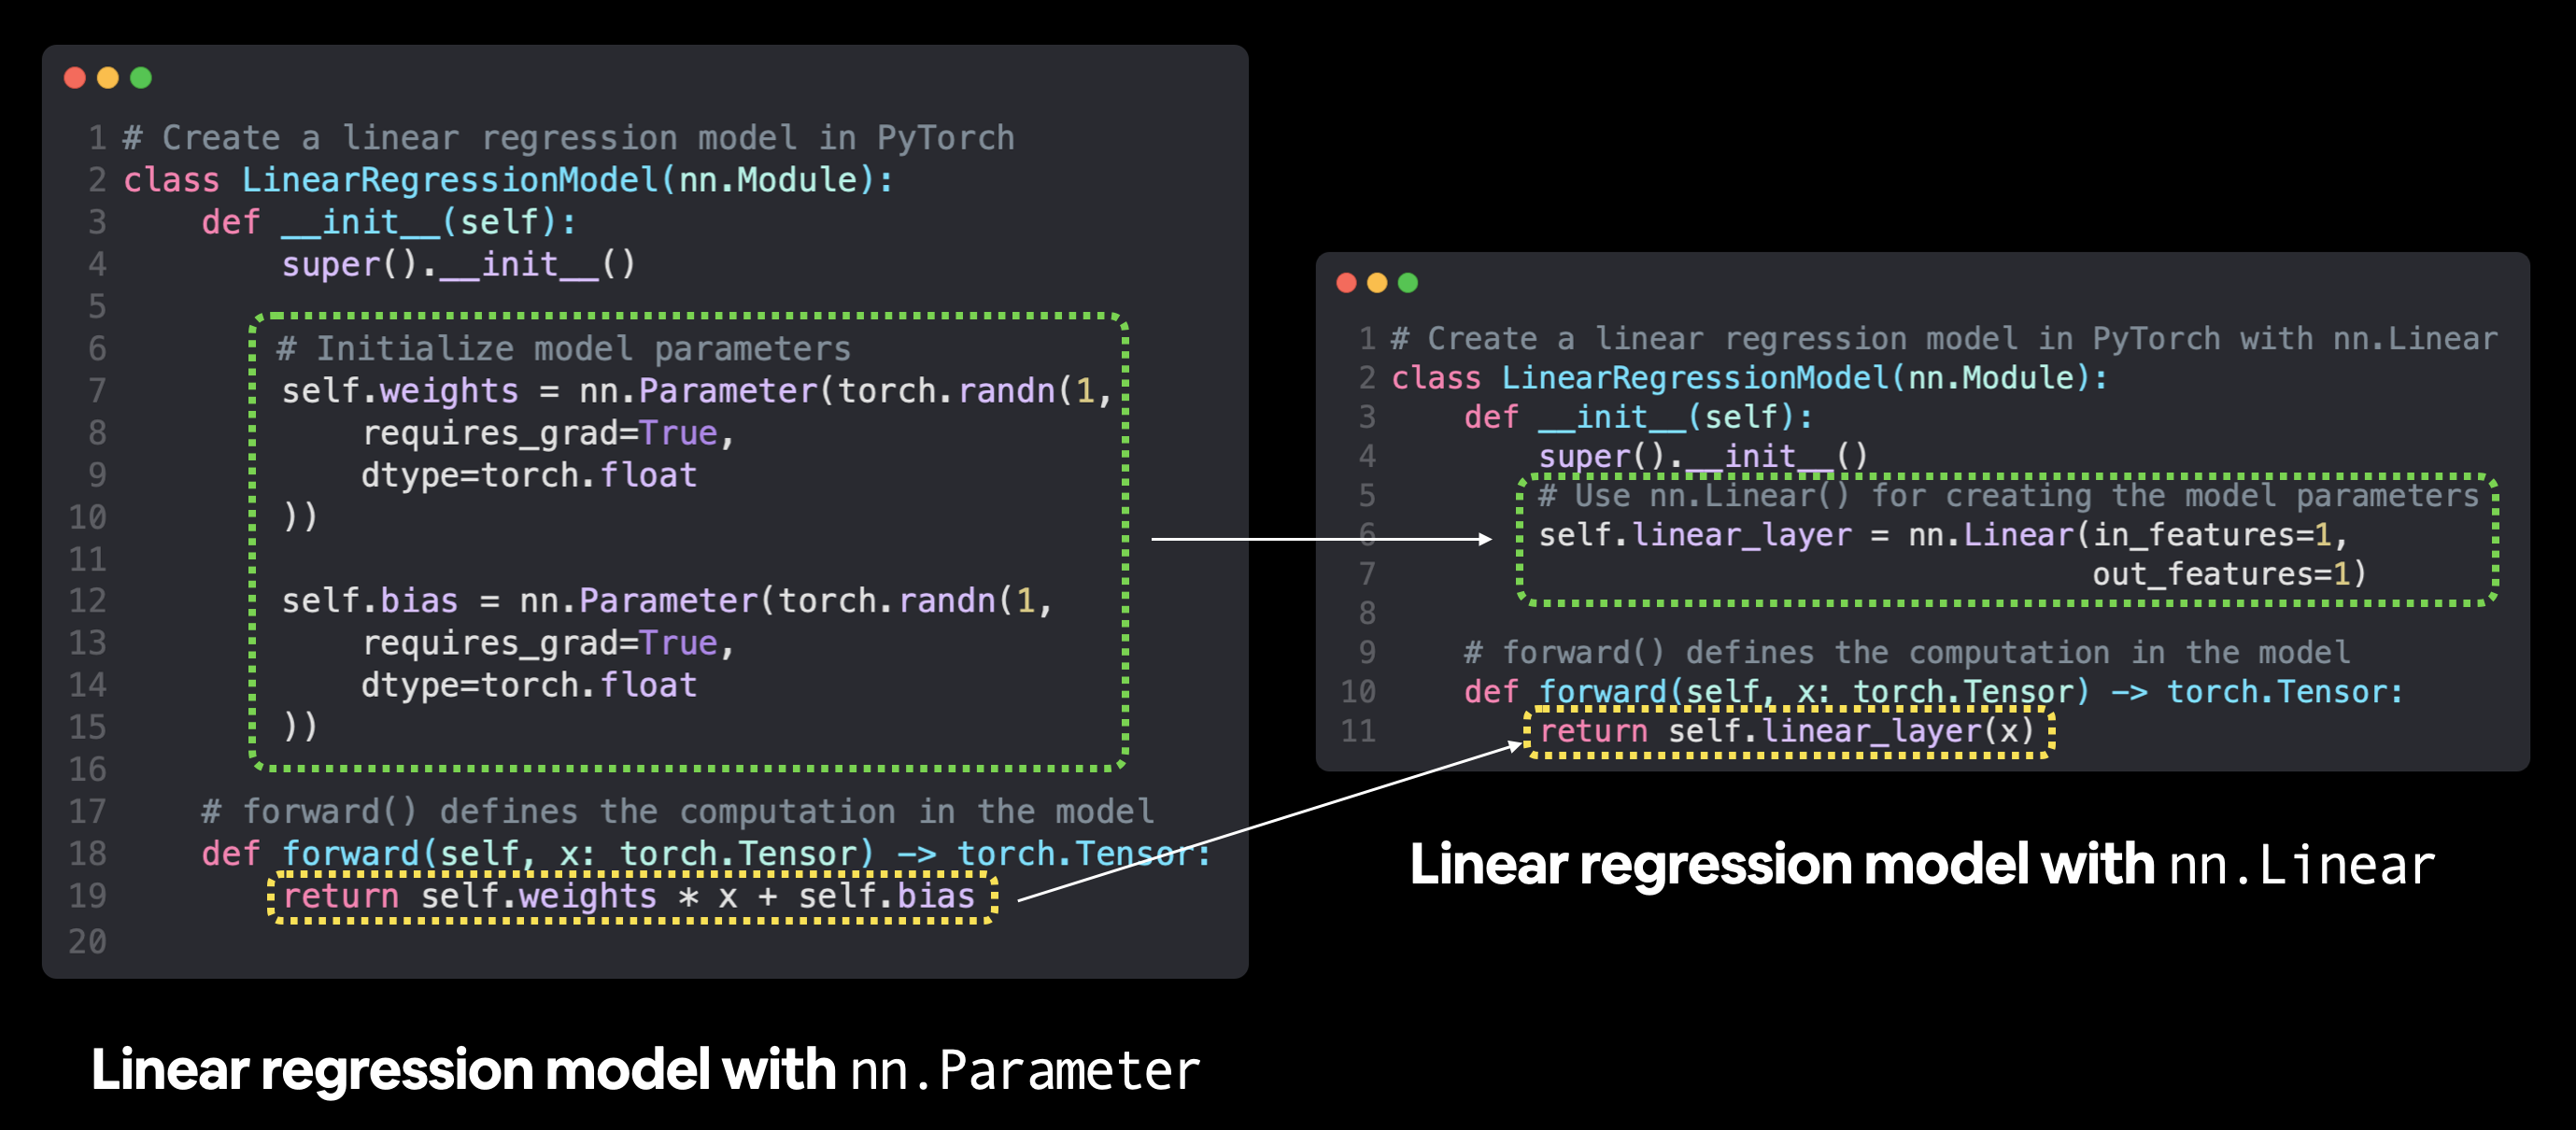

In [59]:
# Subclass nn.module to the model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # Using nn.Linear to create the parameters
    self.Linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  # Defining the forward computation function
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.Linear_layer(x)

# Set the random seed while creating the model
torch.manual_seed(42)
model1=LinearRegressionModelV2()
model1, model1.state_dict()

(LinearRegressionModelV2(
   (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('Linear_layer.weight', tensor([[0.7645]])),
              ('Linear_layer.bias', tensor([0.8300]))]))

In [60]:
# Checking the model device
next(model1.parameters()).device

device(type='cpu')

We are using CPU by default

Setting the device to GPU (if available)

In [61]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [62]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model1.parameters()).device

device(type='cuda', index=0)

### Training the model

Making the training and testing loop

In [63]:
# Create the loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.Adam(params=model1.parameters(),
                             lr=0.01)

In [64]:
# Setting up the seed
torch.manual_seed(42)

# Making the loss lists for visualisations
train_loss_values=[]
test_loss_values=[]
epoch_count=[]

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Setting up the epoch count
epochs=1000

for epoch in range(epochs):
  #### Training phase ####

  # Get the model in train mode
  model1.train()

  # Forward pass with the training data
  y_pred = model1(X_train)

  # Calculate loss
  loss = loss_fn(y_pred, y_train)

  # Zero the grad optimizer
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Step the optimizer
  optimizer.step()

  #### Testing phase ####

  # Get the model in evaluation mode
  model1.eval()

  # Forward pass the testing data
  with torch.inference_mode():
    test_pred = model1(X_test)

    # Calculate the loss
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

  if epoch % 10 ==0:
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test loss: {test_loss}")
      epoch_count.append(epoch)

      # Use cpu(), since the values we got are on other device
      # To convert them to numpy, they must be on CPU
      train_loss_values.append(loss.cpu().detach().numpy())
      test_loss_values.append(test_loss.cpu().detach().numpy())


Epoch: 0 | MAE Train Loss: 0.5551779866218567 | MAE Test loss: 0.568547248840332
Epoch: 10 | MAE Train Loss: 0.41617804765701294 | MAE Test loss: 0.3795474171638489
Epoch: 20 | MAE Train Loss: 0.27717819809913635 | MAE Test loss: 0.19054758548736572
Epoch: 30 | MAE Train Loss: 0.13817833364009857 | MAE Test loss: 0.012273061089217663
Epoch: 40 | MAE Train Loss: 0.06483235210180283 | MAE Test loss: 0.15948258340358734
Epoch: 50 | MAE Train Loss: 0.06953976303339005 | MAE Test loss: 0.19462478160858154
Epoch: 60 | MAE Train Loss: 0.055640317499637604 | MAE Test loss: 0.14198970794677734
Epoch: 70 | MAE Train Loss: 0.0445832759141922 | MAE Test loss: 0.08211380243301392
Epoch: 80 | MAE Train Loss: 0.035734184086322784 | MAE Test loss: 0.06503850221633911
Epoch: 90 | MAE Train Loss: 0.02559967152774334 | MAE Test loss: 0.05930420756340027
Epoch: 100 | MAE Train Loss: 0.0150412293151021 | MAE Test loss: 0.02901393733918667
Epoch: 110 | MAE Train Loss: 0.004283730871975422 | MAE Test loss: 0

In [66]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('Linear_layer.weight', tensor([[0.6988]], device='cuda:0')),
             ('Linear_layer.bias', tensor([0.2985], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


From the predictions, we can see that the parameters are almost equal to the intended ones

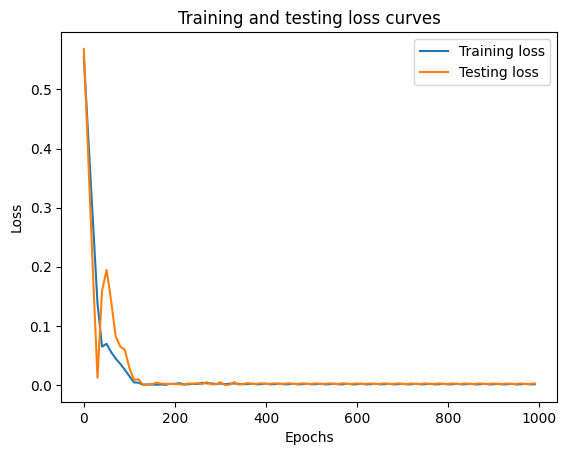

In [68]:
# Now, plotting the loss curves
plt.plot(epoch_count, train_loss_values, label="Training loss")
plt.plot(epoch_count, test_loss_values, label="Testing loss")
plt.title("Training and testing loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

### Making predictions

In [70]:
# Turn model into evaluation mode
model1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model1(X_test)
y_preds

tensor([[0.8575],
        [0.8715],
        [0.8854],
        [0.8994],
        [0.9134],
        [0.9274],
        [0.9414],
        [0.9553],
        [0.9693],
        [0.9833]], device='cuda:0')

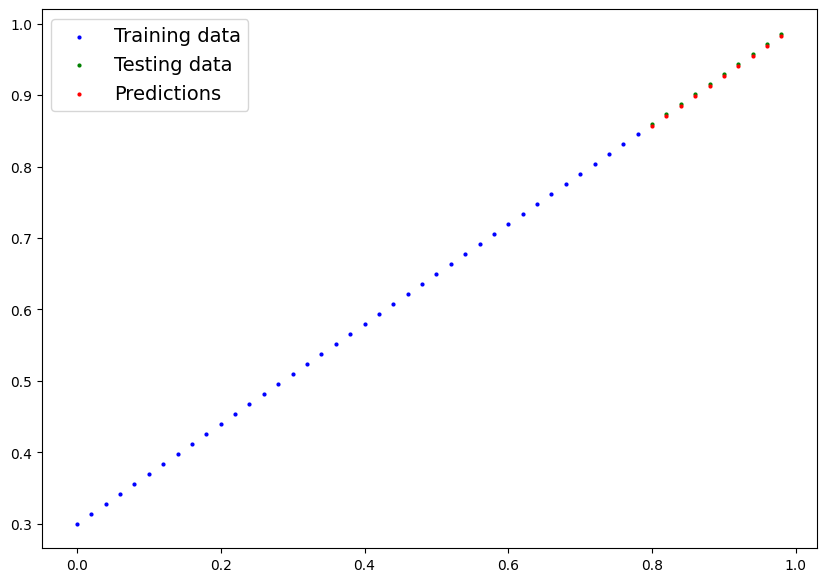

In [71]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

### Saving and loading the model

In [72]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "pytorch_linear_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_linear_model.pth


In [74]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model1 = LinearRegressionModelV2()

# Load model state dict
loaded_model1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model1.to(device)

print(f"Loaded model:\n{loaded_model1}")
print(f"Model on device:\n{next(loaded_model1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [75]:
# Evaluate loaded model
loaded_model1.eval()
with torch.inference_mode():
    loaded_model1_preds = loaded_model1(X_test)
y_preds == loaded_model1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')